In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns

df = pd.read_csv('/Users/oussamanaji/Downloads/oussama_2025_01_14.csv')



In [11]:
df.head()

,id,updated_at,call-center-comments,call-center-status,dealer,type,diago_first_contact,created_at,phone_number,last_event_type,status-reason,source,form_id,campaign_id,campaign_name,updated_by,source_first_contact,purchase_intention,outcome,ecart
0,00QaT000007MKYjUAO,2025-01-09 16:02:27+00:00,Client a déjà été contacté par un autre interl...,Qualified,FRAV02678,update_user,2025-01-08 16:05:34.066000+00:00,2025-01-08 15:40:18+00:00,33145683129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qualified,0 days 00:25:16.066000
1,00QaT000007SmorUAC,NaN,NaN,NaN,NaN,waiting_for_update,2025-01-13 12:25:38.618000+00:00,2025-01-13 12:05:56+00:00,33164013282,call_schedule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Waiting for lead update,0 days 00:19:42.618000
2,00QaT0000072OWsUAM,2024-12-26 11:22:08+00:00,NaN,Not interested,NaN,update_user,2024-12-24 00:23:36.425000+00:00,2024-12-24 00:00:09+00:00,33175914536,NaN,Unsuccessful Contact Attempts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unsuccessful Contact Attempts,0 days 00:23:27.425000
3,00QaT000005vDiQUAU,2024-11-12 17:10:09+00:00,NaN,Not interested,NaN,update_user,2024-11-09 13:27:39.861000+00:00,2024-11-09 13:04:32+00:00,33601041363,NaN,Unsuccessful Contact Attempts,TimeOneLMT,701aT00000AjXyCQAV,VP_RDV_AFFILIATION_RESERVERUNESSAI2,R1E_API,TimeOneLMT,2024-11-09T13:04:32.000Z,NaN,Unsuccessful Contact Attempts,0 days 00:23:07.861000
4,00QaT000006MXZlUAO,2024-11-27 09:21:58+00:00,NaN,Not interested,NaN,update_user,2024-11-25 14:57:38.942000+00:00,2024-11-25 14:34:06+00:00,33601375425,NaN,Unsuccessful Contact Attempts,TimeOneLMT,701aT00000AjXyCQAV,VP_RDV_AFFILIATION_RESERVERUNESSAI2,R1E_API,TimeOneLMT,2024-11-25T14:34:06.000Z,NaN,Unsuccessful Contact Attempts,0 days 00:23:32.942000


In [9]:
df.columns

Index(['id', 'updated_at', 'call-center-comments', 'call-center-status',
       'dealer', 'type', 'diago_first_contact', 'created_at', 'phone_number',
       'last_event_type', 'status-reason', 'source', 'form_id', 'campaign_id',
       'campaign_name', 'updated_by', 'source_first_contact',
       'purchase_intention', 'outcome', 'ecart'],
      dtype='object')

In [2]:
colonnes = ['outcome','ecart','created_at']
df = df[colonnes]
df['ecart'] = pd.to_timedelta(df['ecart'])
df = df[(df['ecart'] > pd.Timedelta(0)) & (df['ecart'] < pd.Timedelta(minutes=40)) & (df['outcome'] != 'Waiting for lead update')]
#df

In [2]:
df['outcome'].unique()

array(['Qualified', 'Unsuccessful Contact Attempts',
       'Conversation denied', 'Pending lead answer', 'Purchase Cancelled',
       'Already bought a car', 'Invalid Data', 'Lead’s own initiative',
       nan], dtype=object)

  ecart_interval                        outcome
0        0-5 min                   Invalid Data
1       5-10 min                     No outcome
2      10-15 min                      Qualified
3      15-20 min  Unsuccessful Contact Attempts
4      20-25 min  Unsuccessful Contact Attempts
5      25-30 min  Unsuccessful Contact Attempts
6      30-35 min            Conversation denied
7      35-40 min                     No outcome


/var/folders/x5/qmtm2vv54qzcmzx4h964n_nh0000gp/T/ipykernel_71182/1007200070.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_predominant = df.groupby('ecart_interval')['outcome'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'No outcome').reset_index()


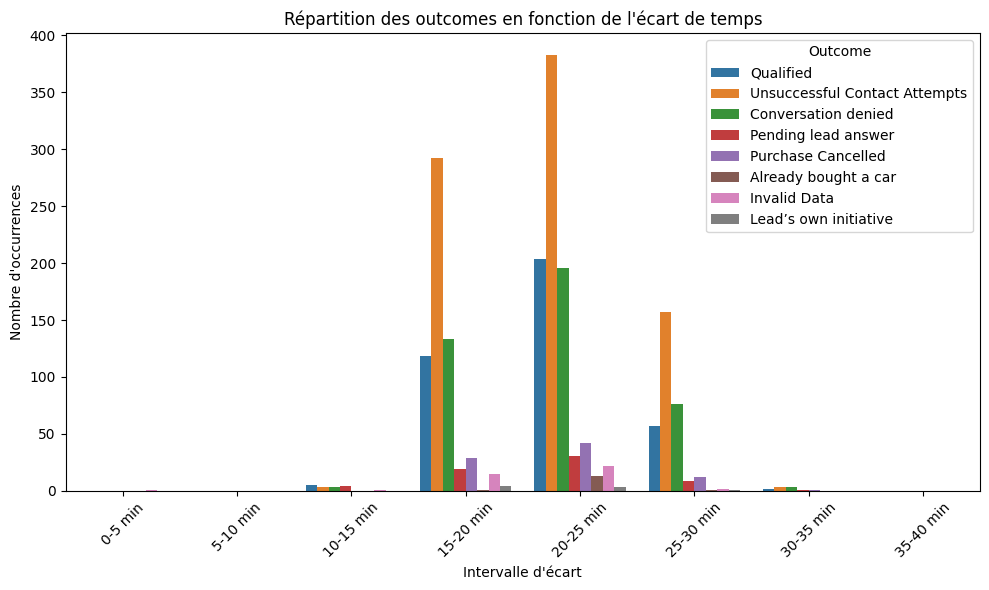

In [3]:
# Créer des intervalles de durée pour la colonne 'ecart'
bins = [pd.Timedelta(minutes=x) for x in range(0, 41, 5)]  # Intervalles 0-5min, 5-10min, etc.
labels = ['0-5 min', '5-10 min', '10-15 min', '15-20 min', '20-25 min', '25-30 min', '30-35 min', '35-40 min']

# Ajouter une nouvelle colonne 'ecart_interval' pour ces intervalles
df['ecart_interval'] = pd.cut(df['ecart'], bins=bins, labels=labels, right=False)

# Filtrer les lignes où 'outcome' est non-nul
df = df.dropna(subset=['outcome'])

# Vérification de l'existence de groupes non vides avant d'appliquer l'agrégation
outcome_predominant = df.groupby('ecart_interval')['outcome'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'No outcome').reset_index()

# Afficher les résultats de l'agrégation
print(outcome_predominant)

# Visualisation avec seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ecart_interval', hue='outcome', order=labels)
plt.xticks(rotation=45)
plt.title("Répartition des outcomes en fonction de l'écart de temps")
plt.xlabel("Intervalle d'écart")
plt.ylabel("Nombre d'occurrences")
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()

                              count                       mean  \
outcome                                                          
Already bought a car             15  0 days 00:23:06.489066666   
Conversation denied             411  0 days 00:21:42.918175182   
Invalid Data                     41  0 days 00:20:25.902146341   
Lead’s own initiative             8     0 days 00:20:14.044875   
Pending lead answer              64  0 days 00:21:17.261031250   
Purchase Cancelled               84  0 days 00:21:39.877595238   
Qualified                       386  0 days 00:21:36.135347150   
Unsuccessful Contact Attempts   838  0 days 00:21:41.821590692   

                                                     std  \
outcome                                                    
Already bought a car           0 days 00:01:56.131683718   
Conversation denied            0 days 00:03:16.070703165   
Invalid Data                   0 days 00:03:58.859701932   
Lead’s own initiative          0 days 0

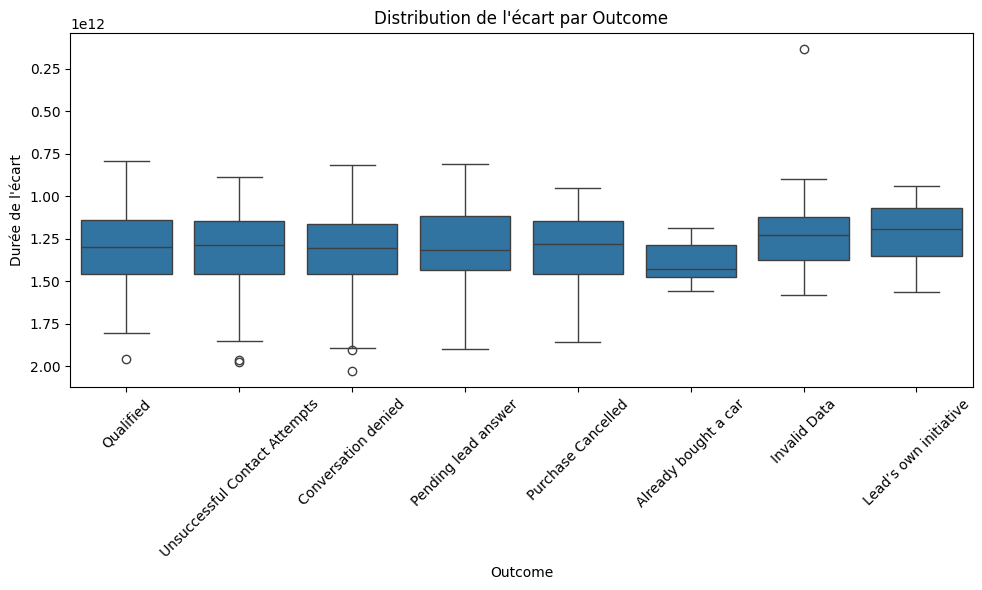

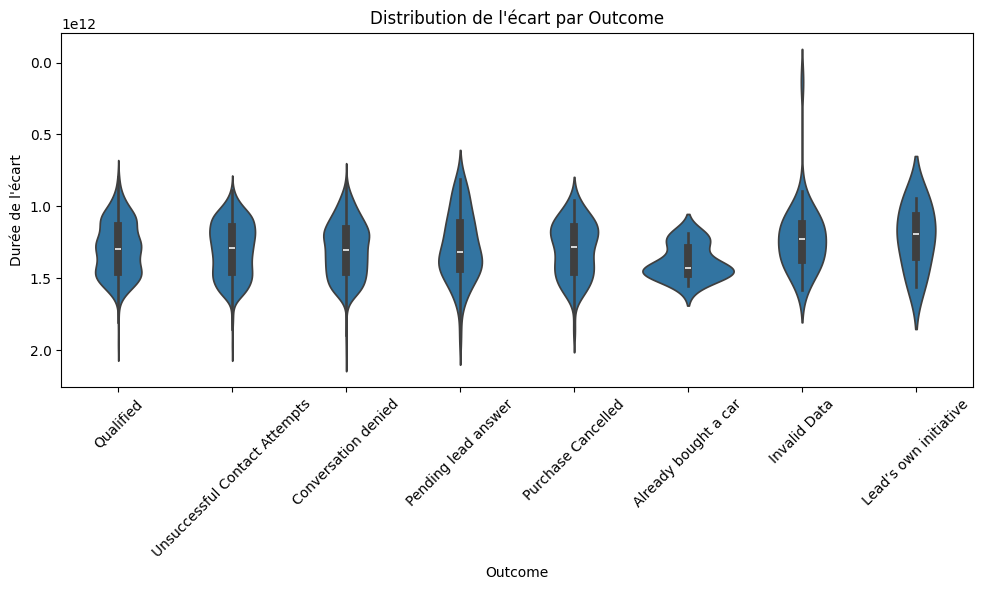

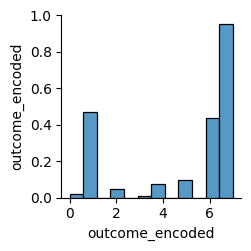

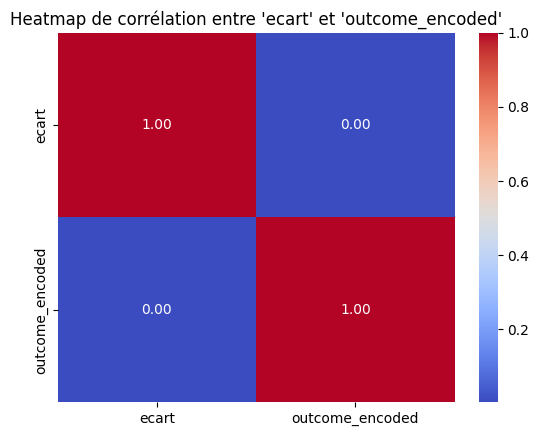

In [4]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr

# Encoder la colonne 'outcome' (nominal to numerical)
le = LabelEncoder()
df['outcome_encoded'] = le.fit_transform(df['outcome'])

# Statistiques descriptives
ecart_stats = df.groupby('outcome')['ecart'].describe()
print(ecart_stats)

# Analyse de corrélation de Spearman
corr, _ = spearmanr(df['ecart'].dt.total_seconds(), df['outcome_encoded'])
print(f"Correlation de Spearman entre 'ecart' et 'outcome': {corr:.2f}")

# Visualisation: Boxplot pour distribuer 'ecart' par outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='outcome', y='ecart')
plt.xticks(rotation=45)
plt.title("Distribution de l'écart par Outcome")
plt.xlabel("Outcome")
plt.ylabel("Durée de l'écart")
plt.tight_layout()
plt.show()

# Visualisation: Violin plot pour mieux voir la distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='outcome', y='ecart')
plt.xticks(rotation=45)
plt.title("Distribution de l'écart par Outcome")
plt.xlabel("Outcome")
plt.ylabel("Durée de l'écart")
plt.tight_layout()
plt.show()

# Visualisation: Pairplot pour examiner la relation entre 'ecart' et outcome
sns.pairplot(df[['ecart', 'outcome_encoded']])
plt.show()

# Heatmap de corrélation pour d'autres variables
corr_matrix = df[['ecart', 'outcome_encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap de corrélation entre 'ecart' et 'outcome_encoded'")
plt.show()

In [5]:
df[['outcome','outcome_encoded']].drop_duplicates()

,outcome,outcome_encoded
0,Qualified,6
2,Unsuccessful Contact Attempts,7
8,Conversation denied,1
16,Pending lead answer,4
32,Purchase Cancelled,5
33,Already bought a car,0
63,Invalid Data,2
361,Lead’s own initiative,3


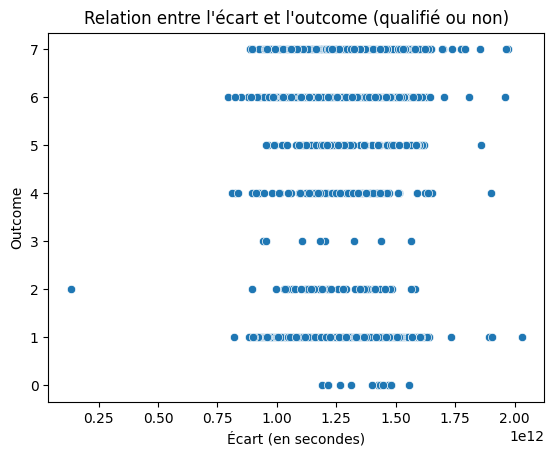

In [6]:

#df['outcome_encoded_2'] = df['outcome'].apply(lambda x: 1 if x == 'Qualified' else 0)

# Visualisation: Scatterplot pour examiner la relation entre 'ecart' et outcome
sns.scatterplot(data=df, x='ecart', y='outcome_encoded')
plt.title('Relation entre l\'écart et l\'outcome (qualifié ou non)')
plt.xlabel('Écart (en secondes)')
plt.ylabel('Outcome')
plt.show()

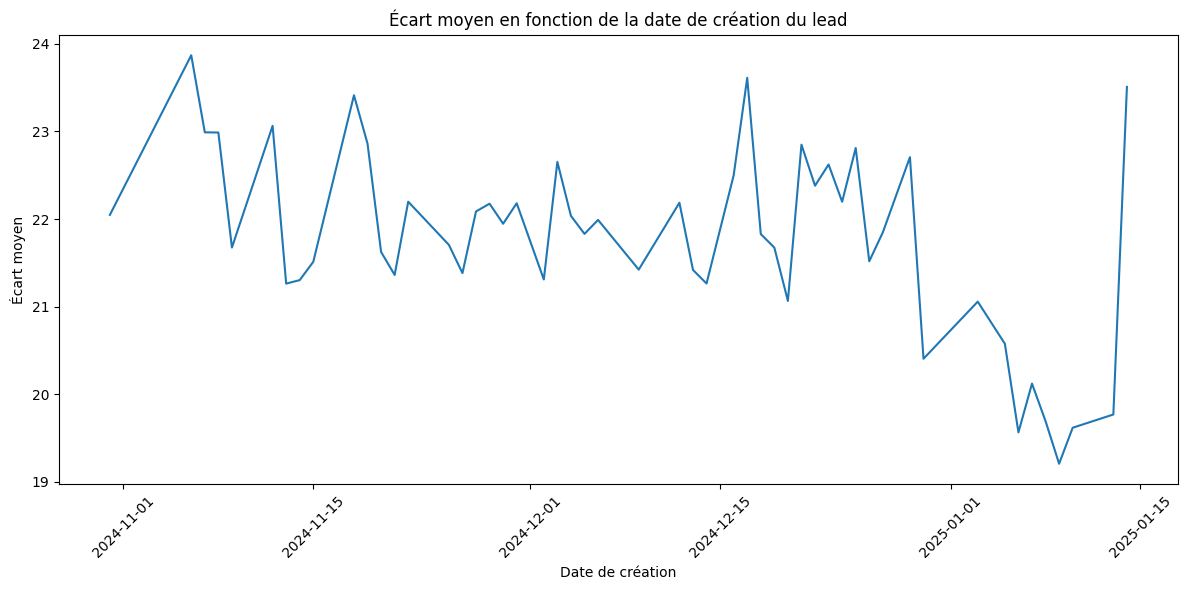

In [19]:
df['created_at'] = pd.to_datetime(df['created_at'])

df['date'] = df['created_at'].dt.date  # Extraire la date sans l'heure
ecart_moyen_par_date = df.groupby('date')['ecart'].mean().reset_index()

ecart_moyen_par_date['ecart'] = ecart_moyen_par_date['ecart'].dt.total_seconds() / 60
# Visualisation Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=ecart_moyen_par_date, x='date', y='ecart')
plt.xticks(rotation=45)
plt.title('Écart moyen en fonction de la date de création du lead')
plt.xlabel('Date de création')
plt.ylabel('Écart moyen')
plt.tight_layout()
plt.show()

In [16]:
ecart_moyen_par_date['ecart'].dt.tota

0    0 days 00:22:02.894214285
1    0 days 00:23:52.196777777
2    0 days 00:22:59.416739130
3       0 days 00:22:59.280200
4    0 days 00:21:40.530666666
5    0 days 00:23:03.865578947
6    0 days 00:21:15.816510204
7    0 days 00:21:18.228325581
8       0 days 00:21:30.771500
9    0 days 00:23:24.805923076
10   0 days 00:22:51.681659090
11   0 days 00:21:37.518880952
12   0 days 00:21:21.754352941
13   0 days 00:22:11.930910714
14   0 days 00:21:42.359663157
15   0 days 00:21:23.022333333
16   0 days 00:22:05.244113924
17   0 days 00:22:10.548261904
18   0 days 00:21:56.829181818
19   0 days 00:22:10.858111111
20   0 days 00:21:18.668269230
21   0 days 00:22:39.163266666
22   0 days 00:22:02.222578947
23   0 days 00:21:49.870707317
24   0 days 00:21:59.449055555
25   0 days 00:21:25.412785714
26   0 days 00:22:11.209035714
27   0 days 00:21:25.199590909
28      0 days 00:21:15.889000
29   0 days 00:22:29.949666666
30   0 days 00:23:36.744666666
31   0 days 00:21:49.774162790
32   0 d

In [20]:
df

,outcome,ecart,created_at,ecart_interval,outcome_encoded,date
0,Qualified,0 days 00:25:16.066000,2025-01-08 15:40:18+00:00,25-30 min,6,2025-01-08
2,Unsuccessful Contact Attempts,0 days 00:23:27.425000,2024-12-24 00:00:09+00:00,20-25 min,7,2024-12-24
3,Unsuccessful Contact Attempts,0 days 00:23:07.861000,2024-11-09 13:04:32+00:00,20-25 min,7,2024-11-09
4,Unsuccessful Contact Attempts,0 days 00:23:32.942000,2024-11-25 14:34:06+00:00,20-25 min,7,2024-11-25
5,Qualified,0 days 00:21:35.447000,2024-11-28 14:06:02+00:00,20-25 min,6,2024-11-28
...,...,...,...,...,...,...
2330,Qualified,0 days 00:25:12.582000,2024-12-23 10:42:25+00:00,25-30 min,6,2024-12-23
2331,Lead’s own initiative,0 days 00:19:42.918000,2024-12-04 17:17:53+00:00,15-20 min,3,2024-12-04
2332,Unsuccessful Contact Attempts,0 days 00:26:19.230000,2024-12-09 13:11:17+00:00,25-30 min,7,2024-12-09
2333,Conversation denied,0 days 00:20:23.878000,2024-11-25 14:37:17+00:00,20-25 min,1,2024-11-25


In [ ]:
# Sélectionner les colonnes pertinentes
df = df[['operator', 'outcome']]

# Filtrer les lignes pour inclure seulement 'Qualified' et 'Unsuccessful Contact Attempts'
df = df[df['outcome'].isin(['Qualified', 'Unsuccessful Contact Attempts'])]

# Compter le nombre de 'Qualified' et 'Unsuccessful Contact Attempts' par opérateur
counts = df.groupby('operator')['outcome'].value_counts().unstack(fill_value=0)

# Calculer le taux 'Qualified'/'Unsuccessful Contact Attempts' par opérateur
counts['qualified_rate'] = counts['Qualified'] / counts['Unsuccessful Contact Attempts']

# Afficher les résultats
print(counts[['Qualified', 'Unsuccessful Contact Attempts', 'qualified_rate']])